# Guide for Obtaining uproot through CVMFS

Source the LHCb Environment with access to lhcb tools (not sure if you will need permissions yet)
```bash
source  /cvmfs/lhcb.cern.ch/lib/LbEnv
```
Load an "Lb-Conda" default environment, wrapper scripts which provide access to enivironments over CVMFS.
```bash
lb-conda default bash
pip list
```
The installed packages will now display numerous different packages as this is accessing the full lb-conda environment.
These packages are ready to be used in command line python through
```bash
python script.py
```
etc. You can check that uproot is installed

```bash
python -c 'import uproot as up; print(up.__version__)'
```
which runs python inline.

If you want to use **jupyter**, you will need to create a kernel which can be loaded within jupyter. To do that, while in the Lb-Conda Environment run
```bash
python -m ipykernel install --user --name=lb-condaDefault
```
where name is simply the chosen name given to the kernel.
You should now be able to choose the environment "lb-condaDefault" from the change kernel option within your jupyter notebook.

Jupyter is just one way of running scripts. I just find it useful for building up and testing out elements of a program and find the abillity to add markdown blocks between code convenient and clear for documentation.
For most workflows I test something on jupyter and then write out python functions in a .py file once I have decided something works and I can then import those into future programs.
Any major calculations can be run on the local cluster which is able to access all of the environemnts mentioned above and packages such as papermill allow jupyter notebooks to be processed on the command line

In [1]:
import uproot4 as up
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os
import sys
import copy


# Reading .root Files with UpRoot

Documentation: https://uproot.readthedocs.io/en/latest/basic.html

A pythonic way to open root files and read the arrays directly into numpy/panda/other python data frames.
Allows immediate use of numpy/tensorflow for data manipulation and takes reliance on sometimes difficult root install away.
Allows simple use of python modules such as matplotlib, scikit-learn etc.

Drawbacks: Currently only reads ntuples, so when saving processed tuples I am currently saving them as .npy files. This is false now apparently, new version has been released with write capabilities!

### Tutorial on Opening .root files with Numpy
Essentially follows above documentation as that is where I learnt all this from!

Location Of Tuple

In [2]:
fileLoc="/disk/moose/lhcb/djdt/Lb2L1520mueTuples/MC/2016MD/100FilesCheck/job185-CombDVntuple-15314000-MC2016MD_100F-pKmue-MC.root"

Opening file like normal python file opening using a "with" statement

In [3]:
with up.open(fileLoc) as f:
    print(f.keys()) #shows different TTrees inside tuple

['DTT1520me;1', 'DTT1520me/DecayTree;1']


List of all variables in tuple

In [4]:
with up.open(fileLoc+":DTT1520me/DecayTree") as f:
    print(f.keys()) #different "branches" within tree

['Lb_MINIP', 'Lb_MINIPCHI2', 'Lb_MINIPNEXTBEST', 'Lb_MINIPCHI2NEXTBEST', 'Lb_ENDVERTEX_X', 'Lb_ENDVERTEX_Y', 'Lb_ENDVERTEX_Z', 'Lb_ENDVERTEX_XERR', 'Lb_ENDVERTEX_YERR', 'Lb_ENDVERTEX_ZERR', 'Lb_ENDVERTEX_CHI2', 'Lb_ENDVERTEX_NDOF', 'Lb_ENDVERTEX_COV_', 'Lb_OWNPV_X', 'Lb_OWNPV_Y', 'Lb_OWNPV_Z', 'Lb_OWNPV_XERR', 'Lb_OWNPV_YERR', 'Lb_OWNPV_ZERR', 'Lb_OWNPV_CHI2', 'Lb_OWNPV_NDOF', 'Lb_OWNPV_COV_', 'Lb_IP_OWNPV', 'Lb_IPCHI2_OWNPV', 'Lb_FD_OWNPV', 'Lb_FDCHI2_OWNPV', 'Lb_DIRA_OWNPV', 'Lb_TOPPV_X', 'Lb_TOPPV_Y', 'Lb_TOPPV_Z', 'Lb_TOPPV_XERR', 'Lb_TOPPV_YERR', 'Lb_TOPPV_ZERR', 'Lb_TOPPV_CHI2', 'Lb_TOPPV_NDOF', 'Lb_TOPPV_COV_', 'Lb_IP_TOPPV', 'Lb_IPCHI2_TOPPV', 'Lb_FD_TOPPV', 'Lb_FDCHI2_TOPPV', 'Lb_DIRA_TOPPV', 'Lb_HOP', 'Lb_HOP_MASS', 'Lb_HOP_ELECTRON_MASS', 'Lb_P', 'Lb_PT', 'Lb_PE', 'Lb_PX', 'Lb_PY', 'Lb_PZ', 'Lb_REFPX', 'Lb_REFPY', 'Lb_REFPZ', 'Lb_MM', 'Lb_MMERR', 'Lb_M', 'Lb_TRUEID', 'Lb_MC_MOTHER_ID', 'Lb_MC_MOTHER_KEY', 'Lb_MC_GD_MOTHER_ID', 'Lb_MC_GD_MOTHER_KEY', 'Lb_MC_GD_GD_MOTHER_ID', 

Formatted list

In [5]:
with up.open(fileLoc+":DTT1520me/DecayTree") as f:
    print(f.show())

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Lb_MINIP             | double                   | AsDtype('>f8')
Lb_MINIPCHI2         | double                   | AsDtype('>f8')
Lb_MINIPNEXTBEST     | double                   | AsDtype('>f8')
Lb_MINIPCHI2NEXTBEST | double                   | AsDtype('>f8')
Lb_ENDVERTEX_X       | double                   | AsDtype('>f8')
Lb_ENDVERTEX_Y       | double                   | AsDtype('>f8')
Lb_ENDVERTEX_Z       | double                   | AsDtype('>f8')
Lb_ENDVERTEX_XERR    | double                   | AsDtype('>f8')
Lb_ENDVERTEX_YERR    | double                   | AsDtype('>f8')
Lb_ENDVERTEX_ZERR    | double                   | AsDtype('>f8')
Lb_ENDVERTEX_CHI2    | double                   | AsDtype('>f8')
Lb_ENDVERTEX_NDOF    | int32_t                  | AsDtype('>i4')
Lb_ENDVERTEX_COV_    | float[3][3]              | AsDtype(

In [6]:
listSearch("PV")

NameError: name 'listSearch' is not defined

Read in Array, choosing to read in as a numpy array

If you are planning on using pandas I highly encourage it, the scripts I have written won't work but you'd be able to create something better very easily with pandas i think! For pandas use library="pd".

In [ ]:
with up.open(fileLoc+":DTT1520me/DecayTree") as f:
    #print(f.show())
    
    eventNum=f["eventNumber"].array(library="np")
    
print(eventNum)

[   4826    4826    4826 ... 1172112 1172165 1172183]


Read in Multiple Arrays as a dictionary

In [ ]:
with up.open(fileLoc+":DTT1520me/DecayTree") as f:
    #print(f.show())
    
    eventDetails=f.arrays(["eventNumber","runNumber","nPV"],library="np")
    
print(eventDetails)
print(eventDetails["nPV"])

{'eventNumber': array([   4826,    4826,    4826, ..., 1172112, 1172165, 1172183],
      dtype=uint64), 'runNumber': array([14469097, 14469097, 14469097, ..., 14471543, 14471543, 14471543],
      dtype=uint32), 'nPV': array([2, 2, 2, ..., 2, 1, 1], dtype=int32)}
[2 2 2 ... 2 1 1]


Can read in using filters and wildcards etc..

In [ ]:
with up.open(fileLoc+":DTT1520me/DecayTree") as f:
    #print(f.show())
    
    allPT=f.arrays(filter_name="*_PT",library="np")
    
print(allPT.keys())
#print(eventDetails["nPV"])

dict_keys(['Lb_PT', 'LStar_PT', 'p_PT', 'p_AtVtx_PT', 'p_AtSV_PT', 'K_PT', 'K_AtVtx_PT', 'K_AtSV_PT', 'JPs_PT', 'L1_PT', 'L1_AtVtx_PT', 'L1_AtSV_PT', 'L2_PT', 'L2_AtVtx_PT', 'L2_AtSV_PT'])


Can read in and do calculations inline as so

In [ ]:
with up.open(fileLoc+":DTT1520me/DecayTree") as f:
    #print(f.show())
    
    magP=f.arrays(["sqrt(Lb_PX**2+Lb_PY**2+Lb_PZ**2)"],library="np")
    Lb_magP=f.arrays(["Lb_P"],library="np")
print(magP)
print(Lb_magP)

{'sqrt(Lb_PX**2+Lb_PY**2+Lb_PZ**2)': array([ 35719.7876097 ,  35719.78989218,  32927.03556323, ...,
        48493.22764436, 120078.58608181, 202322.25378786])}
{'Lb_P': array([ 35719.7876097 ,  35719.78989218,  32927.03556323, ...,
        48493.22764436, 120078.58608181, 202322.25378786])}


but computationally this is the same as doing 

In [ ]:
with up.open(fileLoc+":DTT1520me/DecayTree") as f:
    #print(f.show())
    
    allLbP=f.arrays(["Lb_PX","Lb_PY","Lb_PZ"],library="np")
    Lb_magP_Calc=np.sqrt(allLbP["Lb_PX"]**2+allLbP["Lb_PY"]**2+allLbP["Lb_PZ"]**2)
print(Lb_magP_Calc)

[ 35719.7876097   35719.78989218  32927.03556323 ...  48493.22764436
 120078.58608181 202322.25378786]


Large files and multiple files can be read in using batches/mutliple worker nodes/joining multiple root files together... or a "cache" can be utillised.

It feels pythonic to use the

In [ ]:
with up.open(fileLoc+":DTT1520me/DecayTree") as f:
    pass

notation. Only opening a file for a short period of time and taking what we need and telling it to close cleanly.
But uproot will only load the arrays into memory that are requested and then cache them. For example...

In [ ]:
import psutil
psutil.Process().memory_info().rss / (1024 * 1024) #printing memory usage in MB

264.91015625

In [ ]:
with up.open(fileLoc+":DTT1520me/DecayTree") as f:
    #print(f.show())
    print(psutil.Process().memory_info().rss / (1024 * 1024))
    print(f.arrays(["Lb_M","JPs_M","LStar_M"],library="np"))
    print(psutil.Process().memory_info().rss / (1024 * 1024))
    print(f.arrays(["Lb_M","JPs_M","LStar_M"],library="np"))
    print(psutil.Process().memory_info().rss / (1024 * 1024))
    
print(psutil.Process().memory_info().rss / (1024 * 1024))

265.26171875
{'Lb_M': array([5678.79881665, 5606.68261987, 5236.47018515, ..., 4805.47021633,
       5338.12701235, 5633.15861662]), 'JPs_M': array([3227.32939131, 2921.75837468, 2921.75837468, ..., 1249.77452967,
       3054.88772298, 2420.65476679]), 'LStar_M': array([1472.20370533, 1516.42556692, 1842.14772752, ..., 1513.94443425,
       1515.62924226, 1525.80880191])}
271.17578125
{'Lb_M': array([5678.79881665, 5606.68261987, 5236.47018515, ..., 4805.47021633,
       5338.12701235, 5633.15861662]), 'JPs_M': array([3227.32939131, 2921.75837468, 2921.75837468, ..., 1249.77452967,
       3054.88772298, 2420.65476679]), 'LStar_M': array([1472.20370533, 1516.42556692, 1842.14772752, ..., 1513.94443425,
       1515.62924226, 1525.80880191])}
271.17578125
264.73046875


Mem Usage:
- Up by small amount to load in keys of dataset
- loads the info
- it is now cached hence no change in usage
- Usage drops down as dataset closed

Hence you are able to use up.open without the "with" statement safely for processing lots of different branches interactivelt as it will not draw large mem usages. Generally best to store branches of interest in arrays/dictionaries however and **always close at end** 

In [ ]:
print(psutil.Process().memory_info().rss / (1024 * 1024))
f=up.open(fileLoc+":DTT1520me/DecayTree")
    #print(f.show())
print(psutil.Process().memory_info().rss / (1024 * 1024))
print(f.arrays(["Lb_M","JPs_M","LStar_M"],library="np"))
print(psutil.Process().memory_info().rss / (1024 * 1024))
print(f.arrays(["Lb_M","JPs_M","LStar_M"],library="np"))
print(psutil.Process().memory_info().rss / (1024 * 1024))
f.close()    
print(psutil.Process().memory_info().rss / (1024 * 1024))

264.5625
267.66796875
{'Lb_M': array([5678.79881665, 5606.68261987, 5236.47018515, ..., 4805.47021633,
       5338.12701235, 5633.15861662]), 'JPs_M': array([3227.32939131, 2921.75837468, 2921.75837468, ..., 1249.77452967,
       3054.88772298, 2420.65476679]), 'LStar_M': array([1472.20370533, 1516.42556692, 1842.14772752, ..., 1513.94443425,
       1515.62924226, 1525.80880191])}
273.96875
{'Lb_M': array([5678.79881665, 5606.68261987, 5236.47018515, ..., 4805.47021633,
       5338.12701235, 5633.15861662]), 'JPs_M': array([3227.32939131, 2921.75837468, 2921.75837468, ..., 1249.77452967,
       3054.88772298, 2420.65476679]), 'LStar_M': array([1472.20370533, 1516.42556692, 1842.14772752, ..., 1513.94443425,
       1515.62924226, 1525.80880191])}
274.2265625
267.81640625


# Alternative Cache System
I've actually developed a cache like system for my analysis so I don't have to leave a root file open at all times. 

Along with this notebook should be a readonly file called "loadCutPlot.py" in "/disk/homedisk/home/djdt/Lb2Lambda1520emu/tuples".

Copy that into the same dir as this notebook and...

In [ ]:
#imports
%matplotlib notebook 
#switches into inline notebook plotting

from loadCutPlot import *

In [ ]:
pkmueDecayDescriptor=r"$\Lambda_b^0 \rightarrow \Lambda (1520) \mu e$"
loadNTuple(fileLoc=fileLoc,
           treeID="DTT1520me/DecayTree",datasetName="MC",decayName=pkmueDecayDescriptor+"Simulation",
          MCDataset=True)


This has loaded in the dataset in location "fileLoc" and told the code that it is montecarlo and given the dataset the name "MC"

In [ ]:
currMode[0]="MC" #tell code that you want to manipulate load and plot Lb_M data

In [ ]:
LbDataGet("Lb_M") #similar to the array function as earlier but will open and cache that array now.

array([5678.79881665, 5606.68261987, 5236.47018515, ..., 4805.47021633,
       5338.12701235, 5633.15861662])

The plotting functions are quite specific in what paramaters can be parsed to it,
`create1DHist('"Lb_M"**2')` would square the $\Lambda^0_b$ mass values and `create1DHist('"Lb_M"["Lb_M"<5000]')` would only return the values less than 5000 but it can be quite awkward to manipulate. 

`LbDataGet("Lb_M")` will simply return the array corresponding to the variable you ask for, and any manipulation can be performed with that irrespective of syntax. This will still use the "caching" system mentioned also. Hence LbDataGet may be more useful for your applications.

If you do plan on using create1DHist I can tell you more syntax but it is a bit of a mess!

<IPython.core.display.Javascript object>


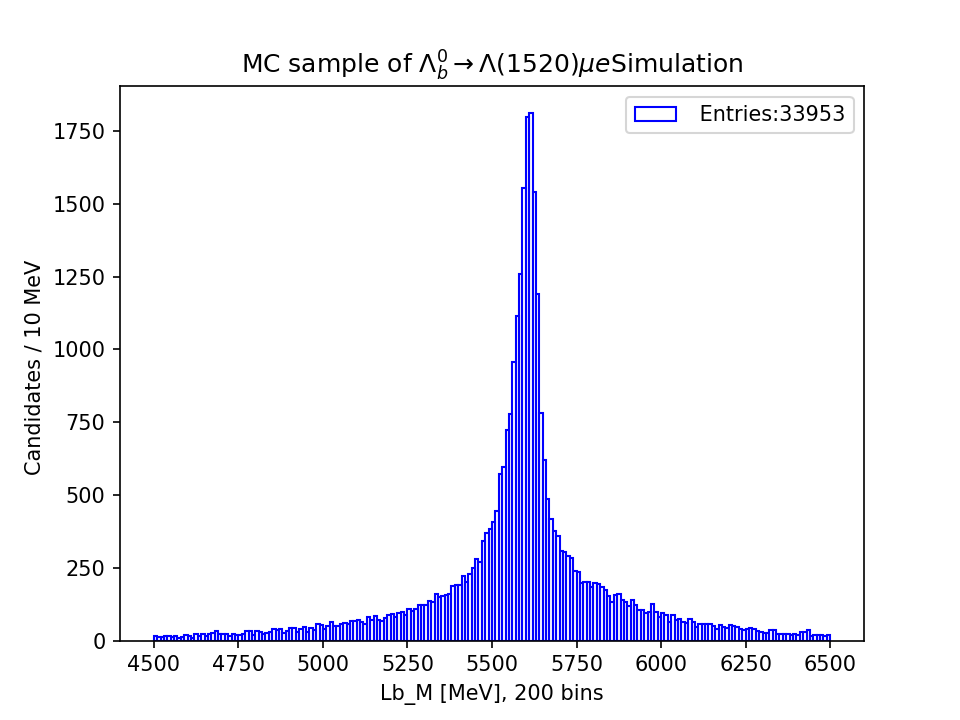

5587.104219045949
279.94000627487014
Taking 1st value for each candidate.


<IPython.core.display.Javascript object>


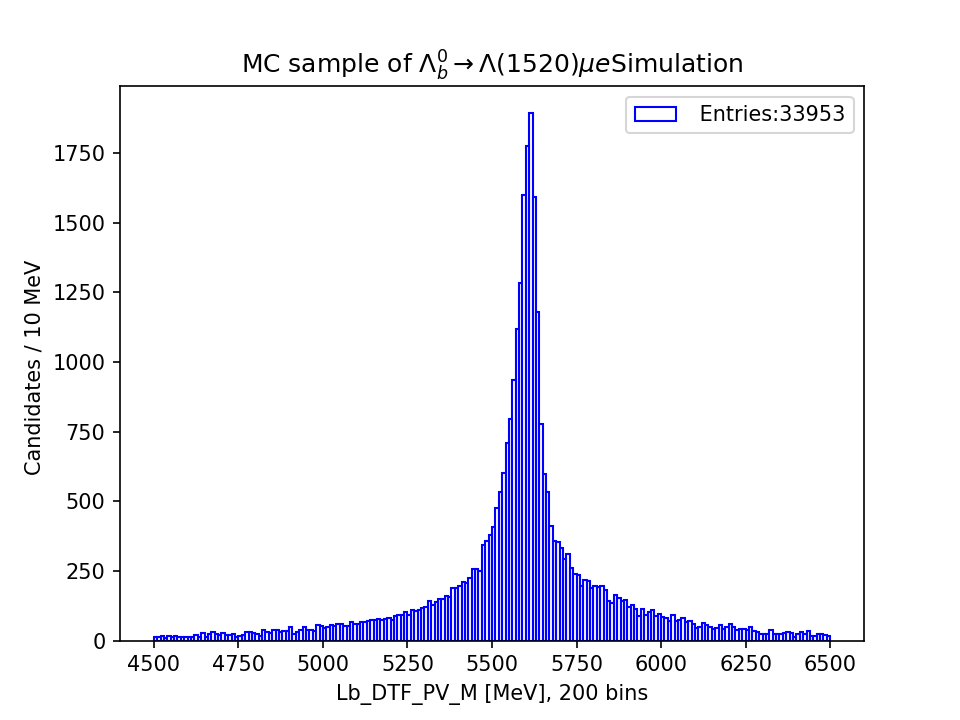

Taking 1st value for each candidate.
Taking 1st value for each candidate.
Taking 1st value for each candidate.
5588.4883
Taking 1st value for each candidate.
Taking 1st value for each candidate.
Taking 1st value for each candidate.
277.7402


In [ ]:
#creating plots of two different variables

a=create1DHist("Lb_M",plotArgs=(4500,6500,200),blindSignalRegion=False)
create1DHist("Lb_DTF_PV_M",plotArgs=(4500,6500,200),blindSignalRegion=False)


<IPython.core.display.Javascript object>


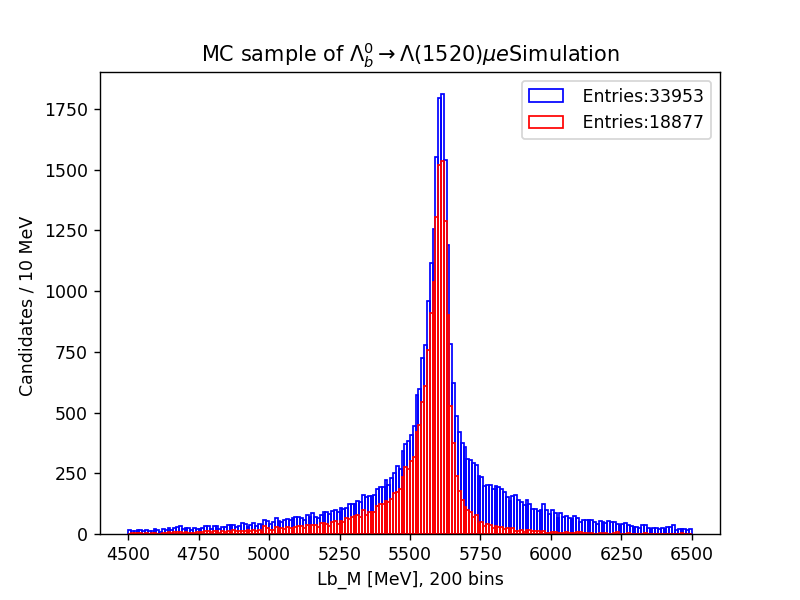

In [ ]:
a=create1DHist("Lb_M",plotArgs=(4500,6500,200),blindSignalRegion=False) #plots can be overlaid
create1DHist("Lb_M",TCut=("TM",truthMatching()),plotArgs=a[1],blindSignalRegion=False,overlay=True,plotDecor=plotDecDict(histCol="r"),outputHist=False)

<IPython.core.display.Javascript object>


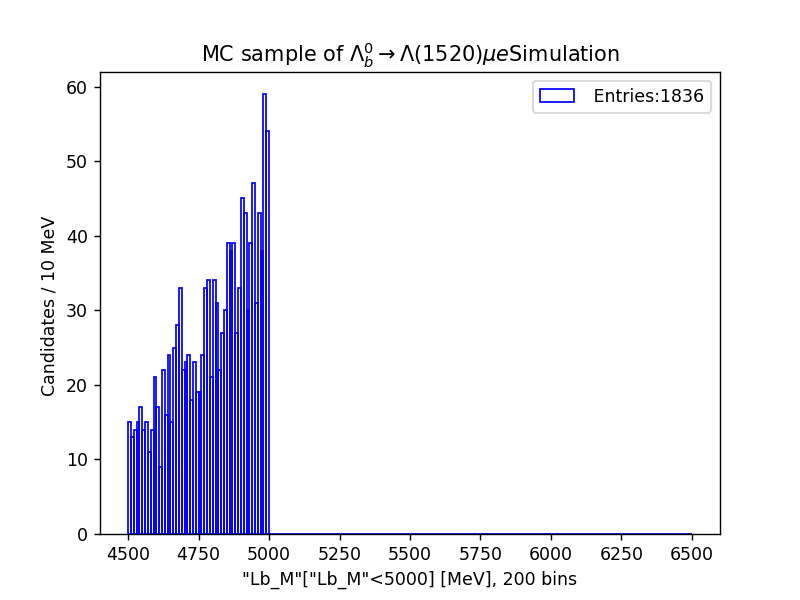

In [ ]:
a=create1DHist('"Lb_M"["Lb_M"<5000]',plotArgs=(4500,6500,200),blindSignalRegion=False)